<a href="https://colab.research.google.com/github/AllanRocha28/Data-Science/blob/main/Setembro_Amarelo_an%C3%A1lise_do_Brasil_e_do_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setembro Amarelo**

#### Segundo o documento Suicídio no Mundo - Estimativas Mundiais de Saúde (Suicide in the world - Global Health Estimates) o suicídio é um problema global, atingindo 800 mil pessoas ao ano e está entre as vinte principais causas de mortes, causando mais vítimas do que doenças como a malária e o câncer de mama, além das guerras e dos homicídios.

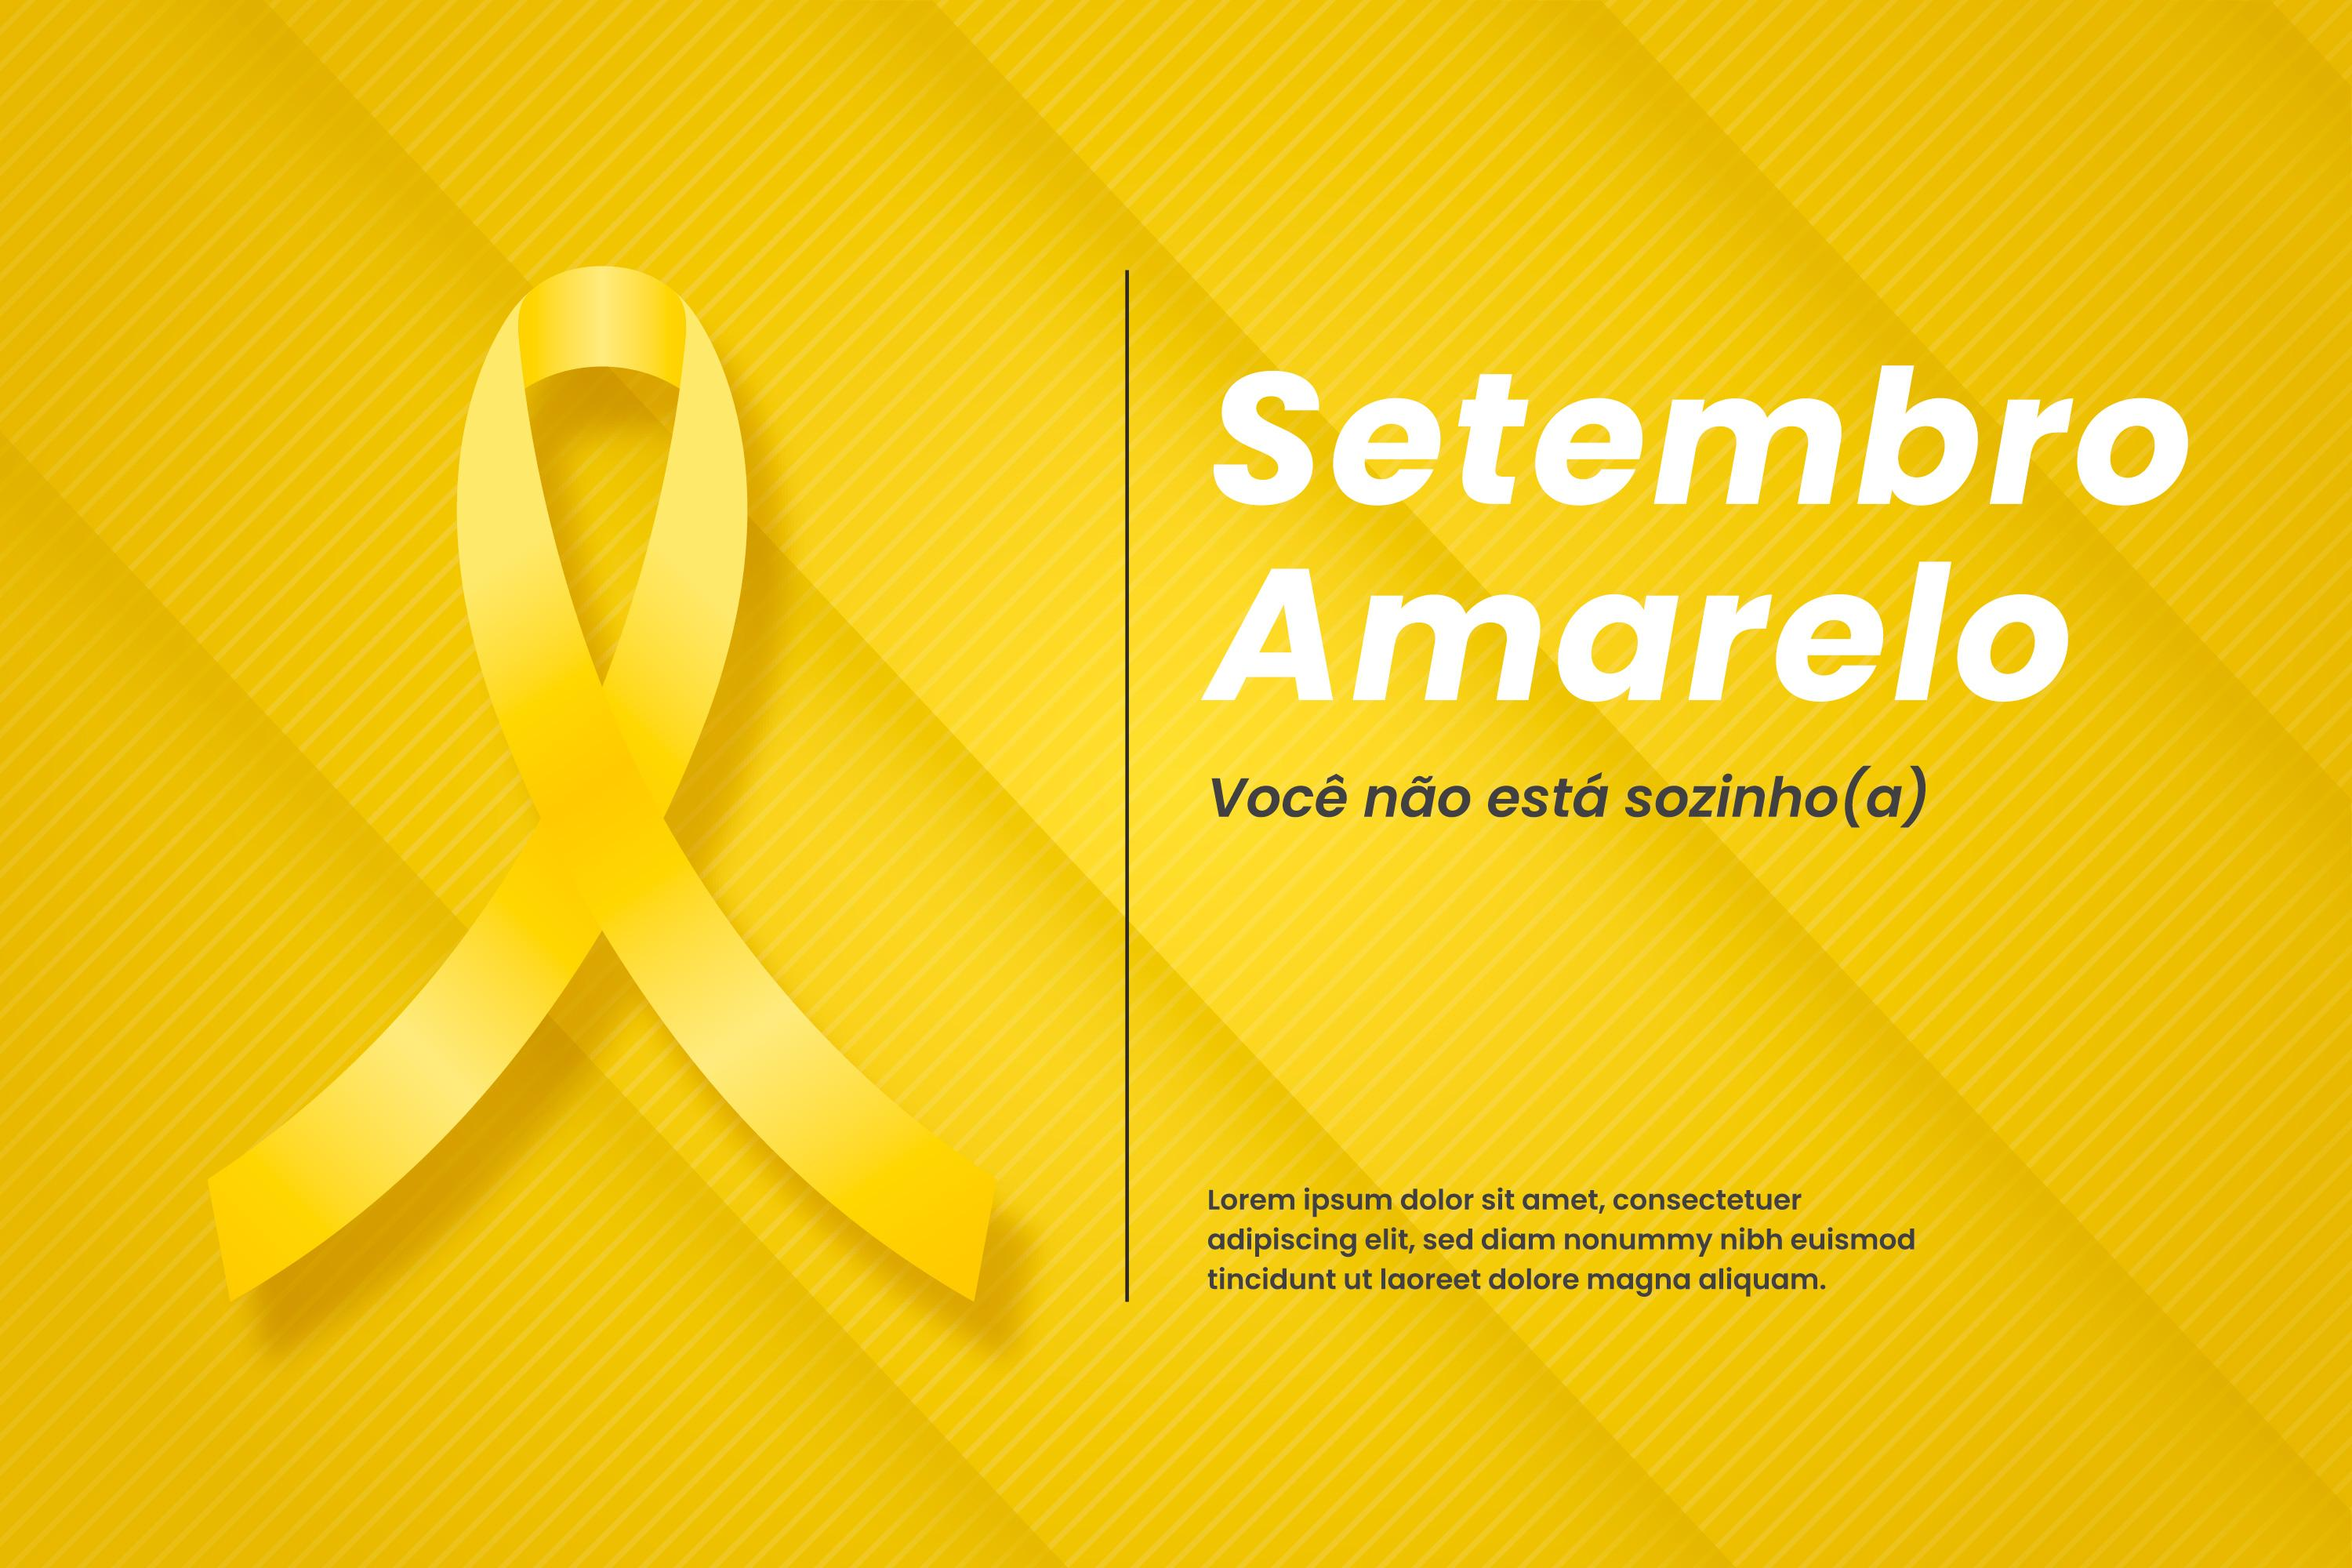

---



#### A Organização Mundial da Saúde (OMS), considera a redução desses índices, como prioridade para as políticas públicas globais.

#### Com o intuito de buscar soluções e conscientizar a população, com relação a este problema de saúde pública, diversas campanhas são adotadas ao longo do ano, e desde 2014, a Associação Brasileira de Psiquiatria (ABP) junto com o conselho Federal de Medicina (CFM), organizam no Brasil o Setembro Amarelo, mês  dedicado à Prevenção ao Suicídio, tendo o dia 10 de setembro, como dia oficial para esta causa.

## **Objetivos**

#### O objetivo desse trabalho é analisar os dados referentes ao suícidio no Brasil e contribuir com informações sobre este grave problema de saúde pública.
#### Comparar os dados do suicídio no Brasil com países:
  - da América Latina: Argentina e Chile;
  - desenvolvidos: EUA, Inglaterra e Japão.

## **Sobre a obtenção dos dados**

#### Os dados utilizados na análise foram baixados do site do [kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).
#### O arquivo utilizado nesta análise é constituído de dados de outros 4 arquivos:


*   United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

*   World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

*   [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

*    World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

#### Esse arquivo já está filtrado e disponível para a análise.

### Descrição das variáveis

#### O arquivo *csv* possui 12 colunas. As variáveis são:

*   **country:** países envolvidos na pesquisa
*   **year:** ano em que houve o registro dos dados
  * **de 1987 a 2016**
*   **sex:** registro do sexo dos indivíduos envolvidos
  *   *male* - masculino
  *   *female* - feminino
*   **age:** faixa etária
  *   5-14 anos
  *   15-24 anos
  *   24-34 anos
  *   35-54 anos
  *   55-74 anos
  *   75+ anos
*   **suicides_no:** número de suicídios
*   **population:** população daquele grupo
*   **suicides/100 pop:** nº de suicídios para cada 100 mil habitantes
*   **country_year:** variável contendo country+year
*   **HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano
*   **gdp_for_year:** Produto Interno Bruto (PIB) para o ano
*   **gdp_for_capita:** Produto Interno Bruto (PIB) per capita

In [1]:
# importação dos pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importação do arquivo que contém os dados
df = pd.read_csv("/content/master.csv")

## **Análise exploratória**

#### O arquivo possui 12 colunas (variáveis) e 27.820 linhas (entrada de dados). Conforme abaixo.

In [3]:
# formato do DataFrame
print("Formato: ", df.shape)

# ver as 5 primeiras e as 5 últimas entradas do dataset
display(df.head())
df.tail() 

Formato:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


#### Neste primeiro momento serão extraídos do DataFrame Mundial os dados referentes ao Brasil.

#### Mais adiante serão analisados os dados dos demais países que foram propostos no 2º objetivo.  

In [4]:
# criando uma cópia dos dados somente do Brasil
df_brasil = df[df.country == "Brazil"].copy()

# ver o formato do DataFrame df_brasil e as 5 primeiras entradas
print("Formato: ", df_brasil.shape)
df_brasil.head()

Formato:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


#### Para ter noção se os dados são viáveis para a análise é necessário saber a quantidade de dados ausentes/nulos.
#### E para realizar a comparação entre diferentes datasets é necessário saber se eles são estatisticamente semelhantes e representativos.

In [5]:
# valores faltantes no DataFrame Mundial
print("Mundial:")
display(df.isnull().sum())

print("\n", "---"*10, "\n")

# valores faltantes no Dataframe do Brasil
print("Brasil:")
display(df_brasil.isnull().sum())

Mundial:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 ------------------------------ 

Brasil:


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

#### Tanto o DataFrame Mundial quanto o do Brasil, possuem bastantes valores faltantes para a variável IDH por ano (*HDI for year*) e portanto esta variável será desconsiderada da análise.

## **Análise da tendência de suicídio**

#### Inicialmente será analisada a média de suicídios por ano no Brasil e no mundo. A análise será feita a partir da variável alvo, suícidio por 100 mil habitantes, dessa forma o número absoluto de suicídio por população não irá interferir na análise, uma vez que a população de um país pode diminuir ou aumentar no espaço de tempo considerado neste estudo.

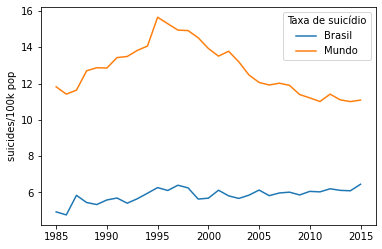

In [6]:
# pegar a media mundial e do Brasil em suicidios
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# como o Brasil nao tem 2016, vou eliminar do dataframe mundial essa entrada
suicides_world_mean.drop(2016, inplace=True)

# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

#### O gráfico apresenta um aumento dos casos de suicídios mundial entre 1990 e 1995 e em seguida há uma diminuição nos números de casos.

#### Para o Brasil observa-se um aumento progressivo do número de casos de suicídios.

### **Faixa etária *vs* Índice de suicídio**

#### A tabela abaixo ajuda a identificar a faixa etária que apresenta o maior número de casos de suicídio por 100 mil habitantes de cada ano.

In [7]:
#Tabela dinâmica
tabela = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

#Ordenando de forma crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
tabela = tabela.reindex(column_order, axis=1)

#Ver as 5 primeiras entradas da tabela
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


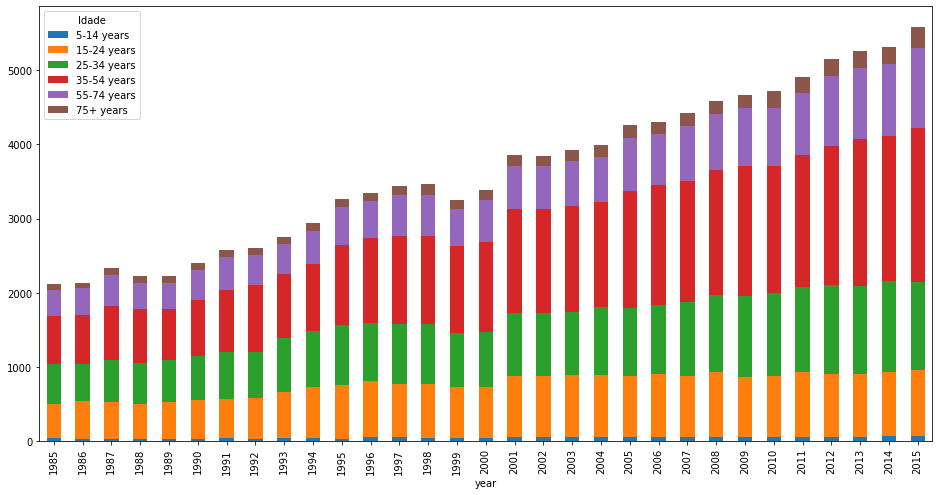

In [8]:
# Gráfico da tabela
tabela.plot.bar(stacked=True, figsize=(16, 8))
plt.legend(title="Idade");

#### O grupo da faixa etária de 35-54 anos apresenta um aumento no números de casos de suicídio, seguido pela de 25-34 anos.

#### Também é possível perceber um crescimento no número de casos de suicídio entre pessoas da faixa etária de 55-74 anos. A princípio podemos destacar como aumento no número de casos de suicídio o aumento do número de pessoas que passaram a atingir essa faixa etária entre 1985 a 2015. Os fatores que realmente pesaram para este crescimento, como o momento econômico do país, vão além da análise deste trabalho.

#### As faixas etárias de 25-34 e 35-54 anos juntas, representam 60% dos casos de suicídios no Brasil para o ano de 2015.
#### Conforme apresentado abaixo, o número de casos de suicídio registrados em 2015 teve um aumento de 164% em relação a 1985.

In [9]:
# estatística dos dados de suicídio para 2015

tabela.loc[2015] / tabela.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

In [10]:
tabela.loc[2015].sum() / tabela.loc[1985].sum()

2.640255439924314

### **Casos de suicídio entre homens e mulheres**

#### Uma análise de grande importância é observar a porcentagem da ocorrência de suicídios entre homens e mulheres.

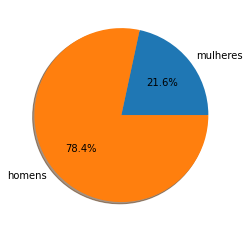

In [11]:
# Separando a variável sex do nosso Dataset
mens_womens = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

#Plotando gráfico de pizza
plt.pie(mens_womens, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

### Correlações com número de suicídios

#### A partir do gráfico de *heatmap*, é possível ver como fatores econômicos e sociais podem ter contribuído para o aumento de casos de suicídio no Brasil, entre esses o PIB e o IDH.

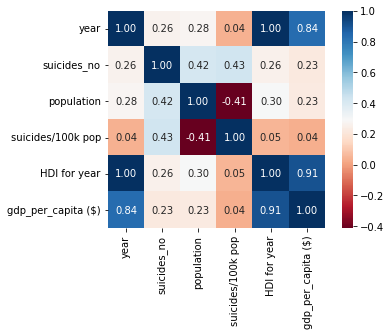

In [12]:
# Heatmap

correlacao = df_brasil.corr()
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#### O IDH por possuir muitos valores ausentes ficou fora da análise, conforme comentado anteriormente. O PIB do país não apresentou nenhuma correlação que pudesse indicar uma diminuição no número de casos de suicídio, como pensa o senso comum. 

In [13]:
# criando uma cópia dos dados da Argentina e Chile
df_argentina = df[df.country == "Argentina"].copy()
df_chile = df[df.country == "Chile"].copy()

# criando uma cópia dos dados da Inglaterra, EUA e Japão
df_inglaterra = df[df.country == "United Kingdom"].copy()
df_eua = df[df.country == "United States"].copy()
df_japan = df[df.country == "Japan"].copy()

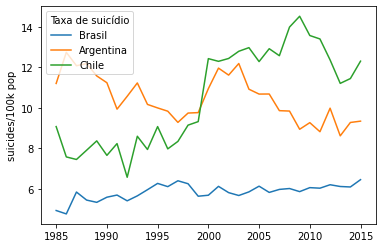

In [14]:
# pegar a media mundial, do Brasil e dos demais países em suicidios
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_argentina_mean = df_argentina.groupby('year')['suicides/100k pop'].mean()
suicides_chile_mean = df_chile.groupby('year')['suicides/100k pop'].mean()
suicides_inglaterra_mean = df_inglaterra.groupby('year')['suicides/100k pop'].mean()
suicides_eua_mean = df_eua.groupby('year')['suicides/100k pop'].mean()
suicides_japan_mean = df_japan.groupby('year')['suicides/100k pop'].mean()

# gráfico do Brasil, Argentina e Chile
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_argentina_mean, label='Argentina')
ax = sns.lineplot(x=years, y=suicides_chile_mean, label='Chile')

plt.legend(title="Taxa de suicídio")
plt.show()

#### A Argentina e o Chile possuiam, até 2015, uma quantidade maior de suicídios do que o Brasil. O Chile apresenta um aumento nesses números, tendo uma acentuação desses casos próximo ao ano 2000; A Argentina vem apresentando uma diminuição desses casos.

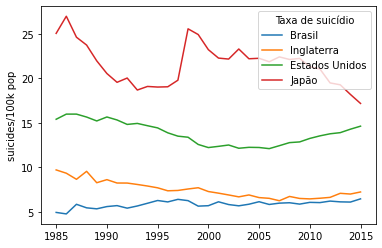

In [15]:
# plotar lineplot comparativo entre Brasil e Mundo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_inglaterra_mean, label='Inglaterra')
ax = sns.lineplot(x=years, y=suicides_eua_mean, label='Estados Unidos')
ax = sns.lineplot(x=years, y=suicides_japan_mean, label='Japão')

#ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

#### O Japão vinha apresentando uma redução nos números de suicídio entre os anos de 1985 e 1997, tendo um aumento acentuado em seguida e agora apresenta uma diminuição.
#### Os Estados Unidos também vinham apresentado uma leve redução, tendo uma inversão a partir de 2022, e em 2015 estava apresentando valores semelhantes aos de 1985.
#### A Inglaterra vem diminuindo ano a ano os números de suicídio e se assemelhando ao número de casos do Brasil. 

## **Conclusão**

#### O número de suicídio no Brasil cresceu muito nesses 30 anos, 164%, com um aumento de casos para as faixas etárias de 25-34 anos e de 35-54. O número de casos é ainda maior para os homens, quase 80%, do que as mulheres.

#### Enquanto o número de casos no mundo por 100 mil habitantes vem reduzindo, os do Brasil apresentam um leve crescimento.
#### Para os paíse da América Latina analisados, percebe-se que estes possuem valores maiores do que o Brasil e somente a Argentina vem apresentando uma redução.
#### Os dados dos países desenvolvidos mostram que esses vem reduzindo suas taxas de suicídio, mas os Estados Unidos acabaram não tendo uma redução efetiva.


#### Ao decorrer deste trabalho, foi possível observar como a análise dos dados pode auxiliar a identificar as taxas de crescimento e possíveis focos de evolução de suicídio em determinados países, permitindo assim, se desejado, estudar mais profundamente, as possíveis causas que afetam diferentes lugares e como lutar e conscientizar a população a respeito de algo tão grave, porém, infelizmente ainda muito negligenciado. 

#### Se de algum modo, este artigo lhe foi útil, fique a vontade para compartilhar e explorá-lo, afinal, o mês de prevenção e conscientização do suicído é em setembro, mas este assunto deve ser abordado o ano todo.